# Part.  1

In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [8]:
y_hat = tf.constant(36)
y = tf.constant(39)

loss = tf.Variable((y - y_hat)**2, name="loss")

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))


9


In [9]:
a = tf.constant(2)
b = tf.constant(10)
c = a * b
print(c)

Tensor("mul:0", shape=(), dtype=int32)


In [21]:
sess = tf.Session()
sess.run(c)

20

In [22]:
x = tf.placeholder(tf.int64, name = "x")
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


In [30]:
def linear_func():
    X = tf.constant(np.random.randn(3,2), name="X")
    
    W = tf.constant(np.random.randn(4,3))
    b = tf.constant(np.random.rand(4,1))
    
#     W = tf.constant(np.zeros((4,3)))
#     b = tf.constant(np.ones((4,1)))
    
    rrr = 0
    
    with tf.Session() as sess:
        rrr = sess.run(tf.matmul(W, X) + b)
        sess.close()
    
    return rrr

print(linear_func())

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


In [45]:
def sigmoid (z):
    x = tf.placeholder(tf.float32, name="x")
#     y = tf.Variable(tf.sigmoid(x), name="y")
    
    with tf.Session() as sess:
        rrr = sess.run(tf.sigmoid(x), feed_dict = {x: z})
        sess.close()
        
    return rrr

print(sigmoid(0), '\t', sigmoid(12))

0.5 	 0.999994


In [46]:
def cost (logits, labels):
    """
    NOTE
    label = y from training sets (not y_hat)
    logit = z from the linear output of the last layer
    sigmoid(logit) = y_hat
    
    """
    
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    
    with tf.Session() as sess:
        rrr = sess.run(tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y), feed_dict = {z: logits, y: labels})
        sess.close()
        
    return rrr


print(cost(sigmoid(np.array([0.2,0.4,0.7,0.9])), np.array([0,0,1,1])))


[ 1.00538719  1.03664088  0.41385433  0.39956614]


In [61]:
def one_hot_matrix(labels, C):
    
    oh = tf.one_hot(labels, C, axis= 0)
    # oh = tf.one_hot(labels, C, 1 , 0, 0)
    # the above is also OK, but, I dont know
    
    with tf.Session() as sess:
        r = sess.run(oh)
        sess.close()
        return r
        

print ("one_hot = " + str(one_hot_matrix(np.array([1,2,3,0,2,1]), C = 4)))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


In [62]:
def ones(shape):
    o = tf.ones(shape)
    with tf.Session() as sess:
        oo = sess.run(o)
        sess.close()
    
    return oo

print(ones((3,3)))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


# Part. 2

`my_code.py`

y = 4


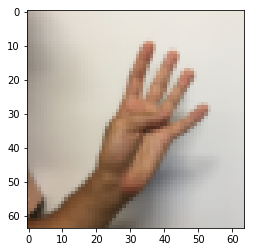

In [63]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Example of a picture
plt.imshow(X_train_orig[5])
print ("y = " + str(np.squeeze(Y_train_orig[:, 5])))

## Run my_code.py

In [1]:
import week3_mycode as myy

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Cost_J	 1.85570192698
Cost_J	 1.01641063799
Cost_J	 0.733256605538
Cost_J	 0.572957228531
Cost_J	 0.468874904694
Cost_J	 0.381079292659
Cost_J	 0.313950483095
Cost_J	 0.254522692525
Cost_J	 0.20410001436
Cost_J	 0.166603455038
Cost_J	 0.142352615794
Cost_J	 0.107728127503
Cost_J	 0.0859882365912
Cost_J	 0.0608975947129
Cost_J	 0.0510507831068


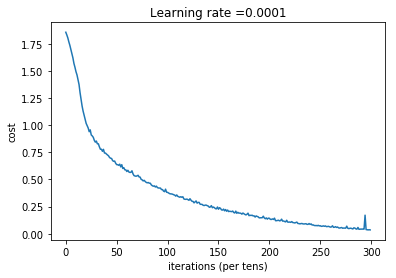

Parameters have been trained!
Train Accuracy: 0.999074
Test Accuracy: 0.725


In [4]:
X_train = myy.X_train
X_test = myy.X_test
Y_train = myy.Y_train
Y_test = myy.Y_test

params = myy.my_model(X_train, Y_train, X_test, Y_test)


Your algorithm predicts: y = 3


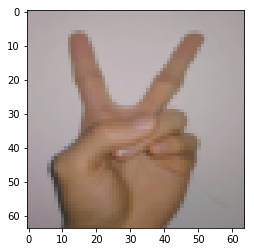

In [27]:
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from tf_utils import predict
%matplotlib inline

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up_org.jpg"
my_image = "my_image_5.jpg"
# my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)
my_image = my_image.reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, params)


print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))